In [1]:
# Import các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_squared_log_error, r2_score


In [2]:
# Đọc dữ liệu từ tập tin CSV
df = pd.read_csv('SONY.csv')


In [3]:
# Chuyển cột 'Date' sang định dạng datetime
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
# Thiết lập cột 'Date' làm chỉ số
df.set_index('Date', inplace=True)

In [6]:
# Chọn cột Close làm biến phụ thuộc
df_Close = df[['Close']]
df_Close = df_Close.reset_index(drop=True)

In [7]:
# Chuẩn hóa dữ liệu với phương pháp Min-Max
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(np.array(df_Close))

In [8]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra theo tỉ lệ 6:4
train_size = int(0.6 * len(data_scaled))
test_size = len(data_scaled) - train_size

train_data = data_scaled[:train_size]
test_data = data_scaled[train_size:]


In [9]:
# Chuẩn bị dữ liệu huấn luyện
x_train = np.arange(train_size).reshape(-1, 1)
y_train = train_data.reshape(-1)

In [10]:
# Huấn luyện một mô hình Hồi quy Tuyến tính
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [11]:
# Hiển thị các hệ số và R-squared của mô hình
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)
print("R-squared:", model.score(x_train, y_train))

Intercept: 0.0236492355164451
Coefficients: [0.00112794]
R-squared: 0.8749115196819017


In [12]:
# Chuẩn bị dữ liệu kiểm tra
x_test = np.arange(train_size, len(data_scaled)).reshape(-1, 1)
y_test = test_data.reshape(-1)

In [13]:
# Dự đoán trên tập kiểm tra
y_pred = model.predict(x_test)

In [14]:
# Đánh giá độ chính xác trên tập kiểm tra
test_mape = mean_absolute_percentage_error(y_test, y_pred)
test_mse = mean_squared_error(y_test, y_pred)
test_rmse = np.sqrt(test_mse)
test_msle = mean_squared_log_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)

print(f"MAPE trên tập kiểm tra: {test_mape}")
print(f"RMSE trên tập kiểm tra: {test_rmse}")
print(f"MSLE trên tập kiểm tra: {test_msle}")
print(f"R² trên tập kiểm tra: {test_r2}")

MAPE trên tập kiểm tra: 1.4705201451771328
RMSE trên tập kiểm tra: 0.7280978063896542
MSLE trên tập kiểm tra: 0.15459859375142992
R² trên tập kiểm tra: -72.60942945607219


In [15]:
# Tạo dự đoán cho 30 ngày tiếp theo sau khi hoàn thành kiểm tra
last_index =  df_Close.index[-1]
x_next_30_days = np.array(range(last_index + 1, last_index + 31)).reshape(-1, 1)
y_next_30_days = model.predict(x_next_30_days)
y_next_30_days = scaler.inverse_transform(np.array([y_next_30_days]).reshape(-1, 1))


In [16]:
# In ra dự đoán giá đóng cửa cho 30 ngày tiếp theo
print('Dự đoán giá đóng cửa cho 30 ngày tiếp theo:')
print(y_next_30_days.flatten())

Dự đoán giá đóng cửa cho 30 ngày tiếp theo:
[172.85685705 172.95449145 173.05212586 173.14976026 173.24739466
 173.34502907 173.44266347 173.54029788 173.63793228 173.73556669
 173.83320109 173.93083549 174.0284699  174.1261043  174.22373871
 174.32137311 174.41900752 174.51664192 174.61427632 174.71191073
 174.80954513 174.90717954 175.00481394 175.10244834 175.20008275
 175.29771715 175.39535156 175.49298596 175.59062037 175.68825477]


In [17]:
# Lấy ngày cuối cùng từ chỉ số hiện tại
last_date = df.index[-1]

In [18]:
# Thêm một ngày vào ngày cuối cùng
next_date = last_date + pd.DateOffset(days=1)

In [19]:
# Tạo danh sách chỉ số bắt đầu từ ngày tiếp theo trong 30 ngày tới
index_next_30_days = pd.date_range(start=next_date, periods=30).tolist()

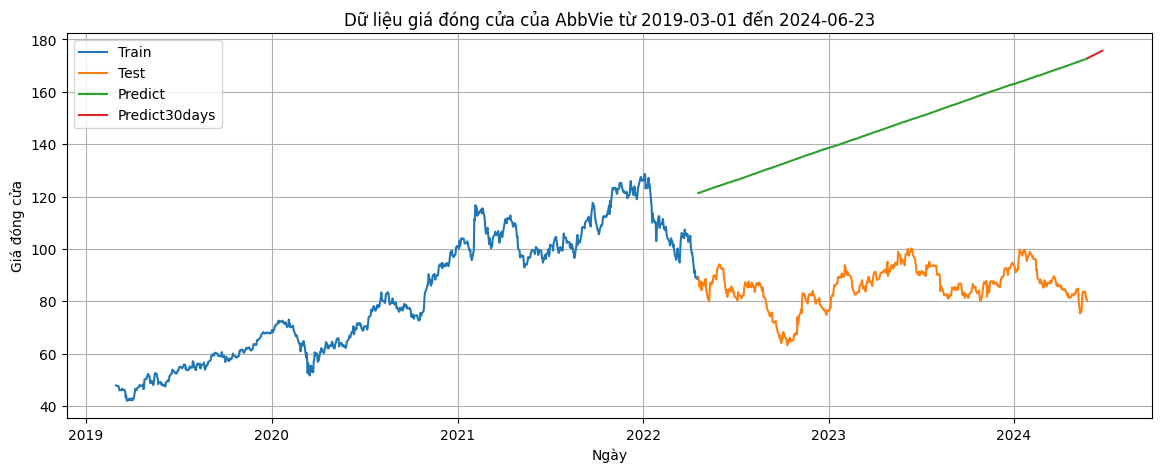

In [20]:
# Vẽ biểu đồ
plt.figure(figsize=(14, 5))

# Vẽ dữ liệu huấn luyện
plt.plot(df.index[:train_size], scaler.inverse_transform(train_data))

# Vẽ dữ liệu kiểm tra
plt.plot(df.index[train_size:], scaler.inverse_transform(test_data))

# Vẽ dự đoán trên tập kiểm tra
plt.plot(df.index[train_size:], scaler.inverse_transform(y_pred.reshape(-1, 1)))

# Vẽ dự đoán cho 30 ngày tiếp theo
plt.plot(index_next_30_days, y_next_30_days)

plt.legend(['Train', 'Test', 'Predict', 'Predict30days'])

plt.grid()
plt.title(f"Dữ liệu giá đóng cửa của AbbVie từ {df.index[0].strftime('%Y-%m-%d')} đến {index_next_30_days[-1].strftime('%Y-%m-%d')}")
plt.xlabel("Ngày")
plt.ylabel("Giá đóng cửa")
plt.show()

In [21]:
# Tạo dự đoán cho 60 ngày tiếp theo
x_next_60_days = np.array(range(last_index + 1, last_index + 61)).reshape(-1, 1)
y_next_60_days = model.predict(x_next_60_days)
y_next_60_days = scaler.inverse_transform(np.array([y_next_60_days]).reshape(-1, 1))

In [22]:
# In ra dự đoán giá đóng cửa cho 60 ngày tiếp theo
print('Dự đoán giá đóng cửa cho 60 ngày tiếp theo:')
print(y_next_60_days.flatten())

Dự đoán giá đóng cửa cho 60 ngày tiếp theo:
[172.85685705 172.95449145 173.05212586 173.14976026 173.24739466
 173.34502907 173.44266347 173.54029788 173.63793228 173.73556669
 173.83320109 173.93083549 174.0284699  174.1261043  174.22373871
 174.32137311 174.41900752 174.51664192 174.61427632 174.71191073
 174.80954513 174.90717954 175.00481394 175.10244834 175.20008275
 175.29771715 175.39535156 175.49298596 175.59062037 175.68825477
 175.78588917 175.88352358 175.98115798 176.07879239 176.17642679
 176.2740612  176.3716956  176.46933    176.56696441 176.66459881
 176.76223322 176.85986762 176.95750203 177.05513643 177.15277083
 177.25040524 177.34803964 177.44567405 177.54330845 177.64094286
 177.73857726 177.83621166 177.93384607 178.03148047 178.12911488
 178.22674928 178.32438369 178.42201809 178.51965249 178.6172869 ]


In [23]:
# Tạo danh sách chỉ số bắt đầu từ ngày tiếp theo trong 60 ngày tới
index_next_60_days = pd.date_range(start=next_date, periods=60).tolist()

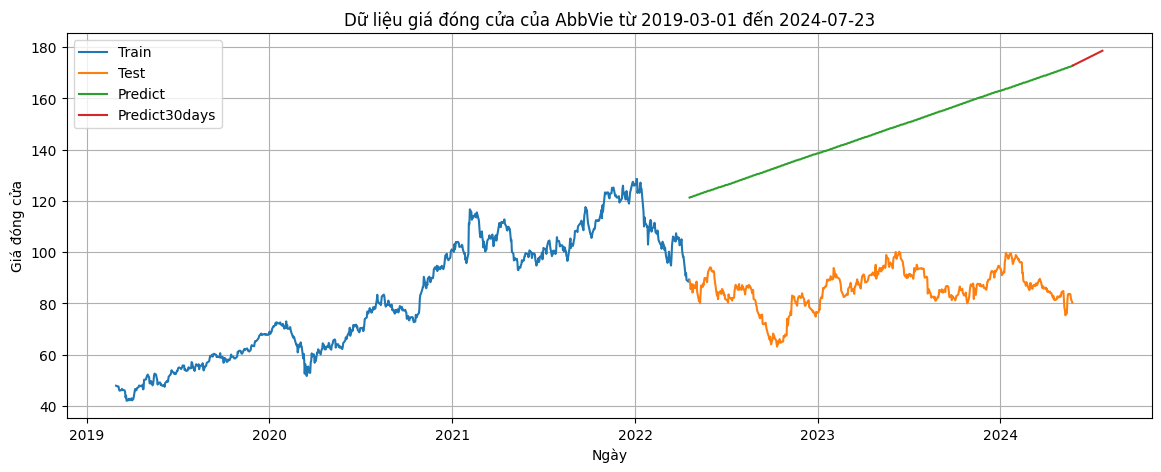

In [24]:
 # Vẽ biểu đồ
plt.figure(figsize=(14, 5))

# Vẽ dữ liệu huấn luyện
plt.plot(df.index[:train_size], scaler.inverse_transform(train_data))

# Vẽ dữ liệu kiểm tra
plt.plot(df.index[train_size:], scaler.inverse_transform(test_data))

# Vẽ dự đoán trên tập kiểm tra
plt.plot(df.index[train_size:], scaler.inverse_transform(y_pred.reshape(-1, 1)))

# Vẽ dự đoán cho 60 ngày tiếp theo
plt.plot(index_next_60_days, y_next_60_days)

plt.legend(['Train', 'Test', 'Predict', 'Predict30days'])

plt.grid()
plt.title(f"Dữ liệu giá đóng cửa của AbbVie từ {df.index[0].strftime('%Y-%m-%d')} đến {index_next_60_days[-1].strftime('%Y-%m-%d')}")
plt.xlabel("Ngày")
plt.ylabel("Giá đóng cửa")
plt.show()

In [25]:
# Tạo dự đoán cho 90 ngày tiếp theo
x_next_90_days = np.array(range(last_index + 1, last_index + 91)).reshape(-1, 1)
y_next_90_days = model.predict(x_next_90_days)
y_next_90_days = scaler.inverse_transform(np.array([y_next_90_days]).reshape(-1, 1))

In [26]:
# Tạo danh sách chỉ số bắt đầu từ ngày tiếp theo trong 90 ngày tới
index_next_90_days = pd.date_range(start=next_date, periods=90).tolist()

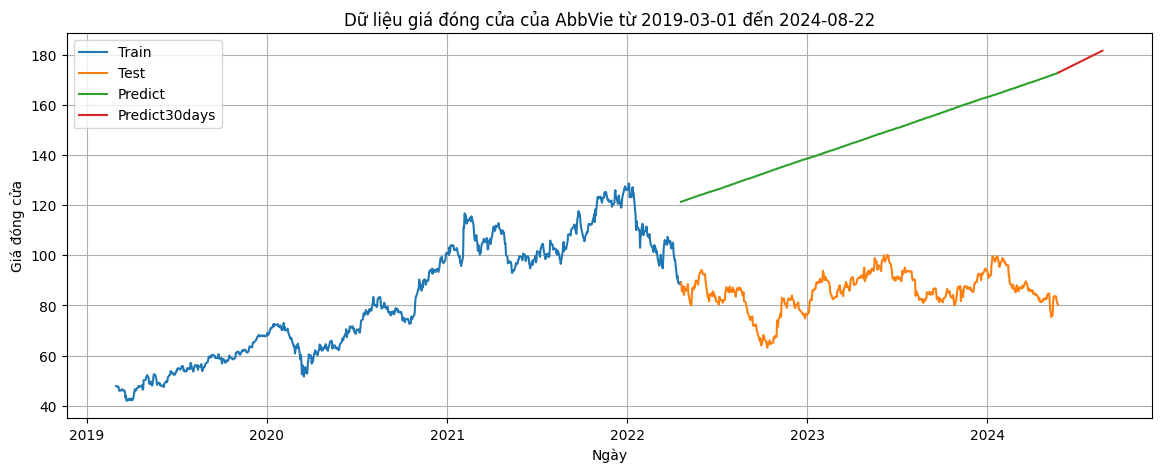

In [27]:
# Vẽ biểu đồ
plt.figure(figsize=(14, 5))

# Vẽ dữ liệu huấn luyện
plt.plot(df.index[:train_size], scaler.inverse_transform(train_data))

# Vẽ dữ liệu kiểm tra
plt.plot(df.index[train_size:], scaler.inverse_transform(test_data))

# Vẽ dự đoán trên tập kiểm tra
plt.plot(df.index[train_size:], scaler.inverse_transform(y_pred.reshape(-1, 1)))

# Vẽ dự đoán cho 90 ngày tiếp theo
plt.plot(index_next_90_days, y_next_90_days)

plt.legend(['Train', 'Test', 'Predict', 'Predict30days'])

plt.grid()
plt.title(f"Dữ liệu giá đóng cửa của AbbVie từ {df.index[0].strftime('%Y-%m-%d')} đến {index_next_90_days[-1].strftime('%Y-%m-%d')}")
plt.xlabel("Ngày")
plt.ylabel("Giá đóng cửa")
plt.show()